In [ ]:
from skimage import data
from skimage.color import rgb2hed
from skimage.color import hed2rgb
from skimage.exposure import rescale_intensity
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import random
import cv2
import tensorflow as tf
from sklearn.datasets import load_sample_images
from sklearn.feature_extraction import image


np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
# Then you’ll see a link, click on that link, allow access
# Copy the code that pops up, paste it in the box, hit enter

from google.colab import drive
drive.mount('/content/gdrive')

# Change working directory to be current folder, please keep ''/content/gdrive/My Drive/XXX' in the path and change XXX to be your own folder.
# The path is case sensitive.
import os
os.chdir('/content/gdrive/My Drive/iss/capstone')
!ls

Mounted at /content/gdrive
colab  data


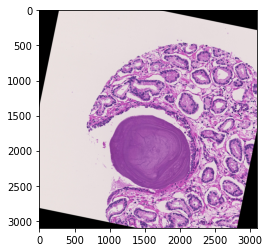

In [ ]:
# rotate
from skimage.transform import rotate

ihc= cv2.imread("./data/images/ZT111_4_A_1_2.jpg",cv2.IMREAD_COLOR)
ihc = cv2.cvtColor(ihc,cv2.COLOR_BGR2RGB)

# perform a random degree rotation
image_with_rotation = rotate(ihc, random.uniform(1, 359))

imgplot = plt.imshow(image_with_rotation)
plt.show()

In [ ]:
# flipping


In [ ]:
# saturation, contrast, brightness 
import tensorflow as tf
from functools import partial

tf.random.set_seed(42)
def color_jitter(image, brightness=0, contrast=0, saturation=0, hue=0):
    """Color jitter.

    Examples
    --------
    >>> color_jitter(img, 5, 0.2, 0.2, 0.1)

    """
    tforms = []
    if brightness > 0:
        print('brightness.....')
        tforms.append(partial(tf.image.random_brightness, max_delta=brightness))
    if contrast > 0:
        print('contrast.....')
        tforms.append(partial(tf.image.random_contrast, lower=max(0, 1 - contrast), upper=1 + contrast))
    if saturation > 0:
        print('saturation.....')
        tforms.append(partial(tf.image.random_saturation, lower=max(0, 1 - saturation), upper=1 + saturation))
    if hue > 0:
        print('hue.....')
        tforms.append(partial(tf.image.random_hue, max_delta=hue))

    random.shuffle(tforms)
    for tform in tforms:
        image = tform(image)

    return image 

brightness.....
contrast.....
saturation.....
hue.....


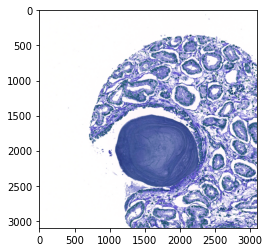

In [ ]:
ihc= cv2.imread("./data/images/ZT111_4_A_1_2.jpg",cv2.IMREAD_COLOR)
ihc = cv2.cvtColor(ihc,cv2.COLOR_BGR2RGB)
ihc_jitter=color_jitter(ihc, 0.4, 0.5, 0.3, 0.3)
imgplot = plt.imshow(ihc_jitter)
plt.show()

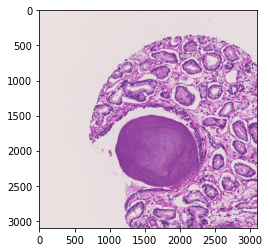

(3100, 3100, 3)


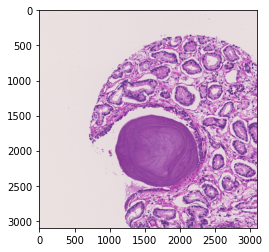

In [ ]:
# Gaussian blurring 
ihc= cv2.imread("./data/images/ZT111_4_A_1_2.jpg",cv2.IMREAD_COLOR)
ihc = cv2.cvtColor(ihc,cv2.COLOR_BGR2RGB)
imgplot = plt.imshow(ihc)
plt.show()
ihc_blur = cv2.GaussianBlur(ihc,(5,5),0)
print(ihc_blur.shape)
imgplot = plt.imshow(ihc_blur)
plt.show()

(3100, 3100, 3)


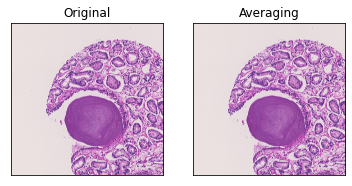

In [ ]:
# Gaussian blurring 
ihc = cv2.imread("./data/images/ZT111_4_A_1_2.jpg",cv2.IMREAD_COLOR)
ihc = cv2.cvtColor(ihc,cv2.COLOR_BGR2RGB)
kernel = np.ones((5,5),np.float32)/25
ihc_blur_2 = cv2.filter2D(ihc,-1,kernel)
print(ihc_blur_2.shape)
plt.subplot(121),plt.imshow(ihc),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(ihc_blur_2),plt.title('Averaging')
plt.xticks([]), plt.yticks([])
plt.show()

Otsu's algorithm implementation thresholding result:  167.7421875


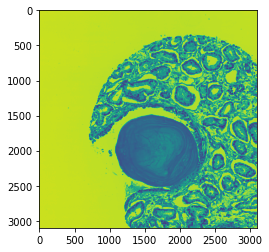

In [ ]:
#otsu-thresholding

ihc = cv2.imread("./data/images/ZT111_4_A_1_2.jpg",cv2.IMREAD_GRAYSCALE)

# Apply GaussianBlur to reduce image noise if it is required
image = cv2.GaussianBlur(ihc, (5, 5), 0)
plt.imshow(image)

# Set total number of bins in the histogram
bins_num = 256

# Get the image histogram
hist, bin_edges = np.histogram(image, bins=bins_num)

# Get normalized histogram if it is required
hist = np.divide(hist.ravel(), hist.max())

# Calculate centers of bins
bin_mids = (bin_edges[:-1] + bin_edges[1:]) / 2.

# Iterate over all thresholds (indices) and get the probabilities w1(t), w2(t)
weight1 = np.cumsum(hist)
weight2 = np.cumsum(hist[::-1])[::-1]

# Get the class means mu0(t)
mean1 = np.cumsum(hist * bin_mids) / weight1
# Get the class means mu1(t)
mean2 = (np.cumsum((hist * bin_mids)[::-1]) / weight2[::-1])[::-1]

inter_class_variance = weight1[:-1] * weight2[1:] * (mean1[:-1] - mean2[1:]) ** 2

# Maximize the inter_class_variance function val
index_of_max_val = np.argmax(inter_class_variance)

threshold = bin_mids[:-1][index_of_max_val]
print("Otsu's algorithm implementation thresholding result: ", threshold)

Obtained threshold:  169.0
otsu shape: (3100, 3100)


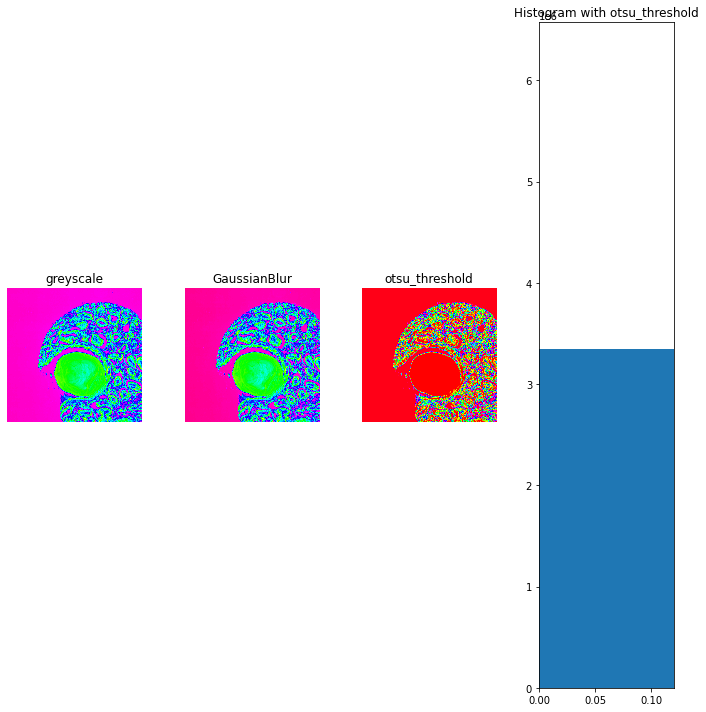

In [ ]:
#X = load_sample_images().images[1]
#ihc = cv2.cvtColor(X,cv2.COLOR_RGB2GRAY)

ihc = cv2.imread("./data/images/ZT111_4_A_1_2.jpg",0)

# Apply GaussianBlur to reduce image noise if it is required
image = cv2.GaussianBlur(ihc, (5, 5), 0)

otsu_threshold, image_result = cv2.threshold(
    image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU,
)
print("Obtained threshold: ", otsu_threshold)
print("otsu shape:", image_result.shape)

fig, ( ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, figsize=(10, 10))


ax1.imshow(ihc, cmap='hsv')
ax1.set_title("greyscale")
ax1.axis('off')
ax2.imshow(image, cmap='hsv')
ax2.set_title("GaussianBlur")
ax2.axis('off')
ax3.imshow(image_result, cmap='hsv')
ax3.set_title("otsu_threshold")
ax3.axis('off')
ax4.hist(image_result.ravel(), 256)
ax4.set_title("Histogram with otsu_threshold")
ax4.axvline(x=otsu_threshold, color='r', linestyle='dashed', linewidth=2)
ax4.set_xbound(0, 0.12)

fig.tight_layout()

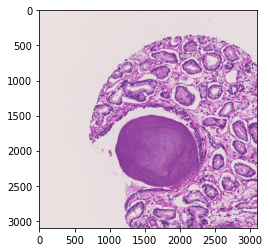

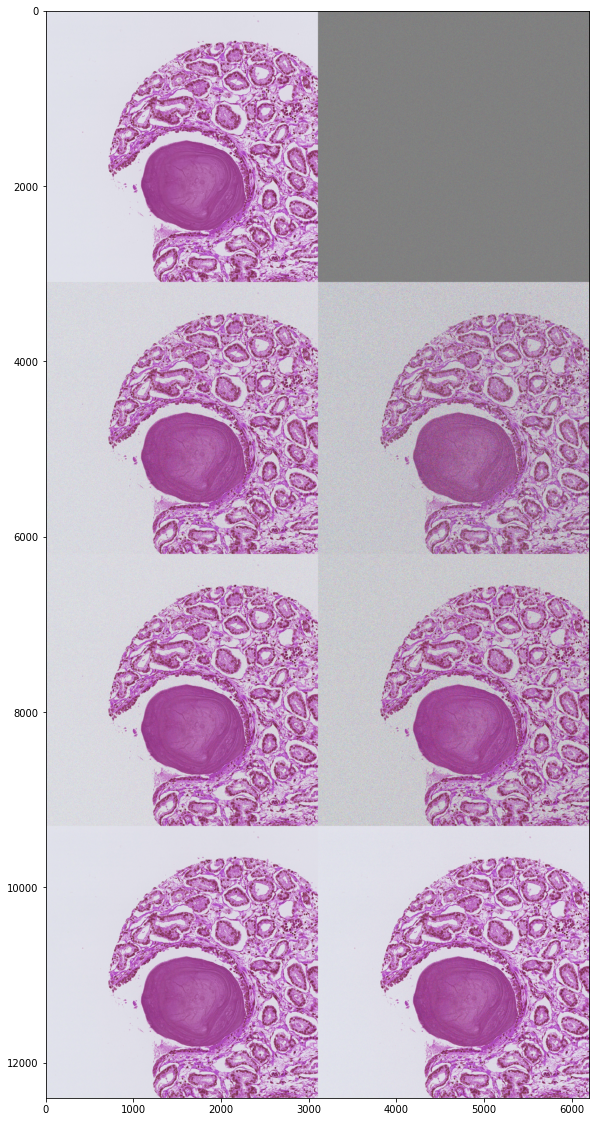

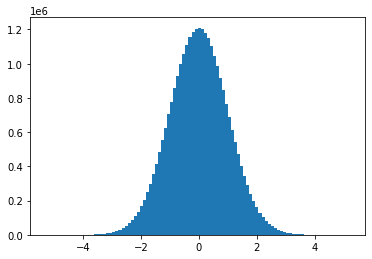

In [ ]:
# additiveGaussian noise
# 3 examples,

# gaussian noise added over image: noise is spread throughout
# gaussian noise multiplied then added over image: noise increases with image value
# image folded over and gaussian noise multipled and added to it: peak noise affects mid values, white and black receiving little noise
# in every case i blend in 0.2 and 0.4 of the image


import numpy as np
import cv2
import matplotlib.pyplot as plt

np.random.seed(42)
tf.random.set_seed(42)

ihc= cv2.imread("./data/images/ZT111_4_A_1_2.jpg",cv2.IMREAD_COLOR)
ihc = cv2.cvtColor(ihc,cv2.COLOR_BGR2RGB)
plt.imshow(ihc)
plt.show()

img = ihc[...,::-1]/255.0
noise =  np.random.normal(loc=0, scale=1, size=img.shape)

# noise overlaid over image
noisy = np.clip((img + noise*0.2),0,1)
noisy2 = np.clip((img + noise*0.4),0,1)

# noise multiplied by image:
# whites can go to black but blacks cannot go to white
noisy2mul = np.clip((img*(1 + noise*0.2)),0,1)
noisy4mul = np.clip((img*(1 + noise*0.4)),0,1)

noisy2mul = np.clip((img*(1 + noise*0.2)),0,1)
noisy4mul = np.clip((img*(1 + noise*0.4)),0,1)

# noise multiplied by bottom and top half images,
# whites stay white blacks black, noise is added to center
img2 = img*2
n2 = np.clip(np.where(img2 <= 1, (img2*(1 + noise*0.2)), (1-img2+1)*(1 + noise*0.2)*-1 + 2)/2, 0,1)
n4 = np.clip(np.where(img2 <= 1, (img2*(1 + noise*0.4)), (1-img2+1)*(1 + noise*0.4)*-1 + 2)/2, 0,1)


# norm noise for viz only
noise2 = (noise - noise.min())/(noise.max()-noise.min())
plt.figure(figsize=(20,20))
plt.imshow(np.vstack((np.hstack((img, noise2)),
                      np.hstack((noisy, noisy2)),
                      np.hstack((noisy2mul, noisy4mul)),
                      np.hstack((n2, n4)))))
plt.show()
plt.hist(noise.ravel(), bins=100)
plt.show()

In [ ]:
# patch processing
  tf.image.extract_patches(images=images,
                           sizes=[1, 3, 3, 1],
                           strides=[1, 5, 5, 1],
                           rates=[1, 1, 1, 1],
                           padding='VALID')

In [ ]:
from sklearn.datasets import load_sample_image
from sklearn.feature_extraction import image
# Use the array data from the first image in this dataset:
ihc= cv2.imread("./data/images/ZT111_4_A_1_2.jpg",cv2.IMREAD_COLOR)
ihc = cv2.cvtColor(ihc,cv2.COLOR_BGR2RGB)
print('Image shape: {}'.format(ihc.shape))
patches = image.extract_patches_2d(ihc, (250, 250))
print('Patches shape: {}'.format(patches.shape))
# Here are just two of these patches:
print(patches[1])


NameError: ignored

Image shape: (427, 640, 3)
Patches shape: (2135, 3, 3)
Patche shape: (3, 3)


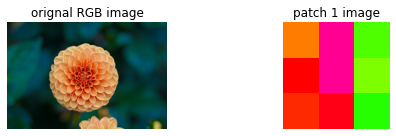

In [ ]:
from sklearn.datasets import load_sample_images
from sklearn.feature_extraction import image
# Use the array data from the second image in this dataset:
X = load_sample_images().images[1]
print('Image shape: {}'.format(X.shape))
pe = image.PatchExtractor(patch_size=(3, 3),max_patches=5)
pe_fit = pe.fit(X)
pe_trans = pe.transform(X)
print('Patches shape: {}'.format(pe_trans.shape))
print('Patche shape: {}'.format(pe_trans[1].shape))

fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(8, 2))

ax0.imshow(X)
ax0.set_title("orignal RGB image")
ax0.axis('off')
ax1.imshow(pe_trans[1], cmap='hsv')
ax1.set_title("patch 1 image")
ax1.axis('off')

fig.tight_layout()

Image shape: (1, 3100, 3100, 3)
patches shape:(1, 12, 12, 187500)


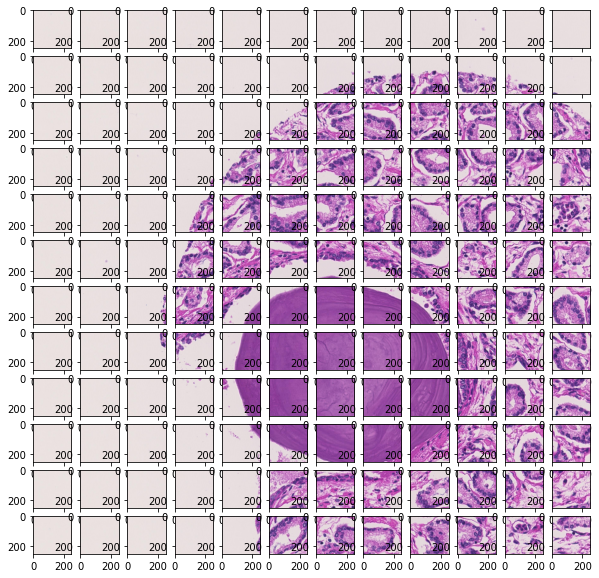

In [ ]:
# we are extracting patches of size (128,128) from the image of size (256,256). 
# This directly translates to the fact that I would want the images to be split into 4 tiles

ihc= cv2.imread("./data/images/ZT111_4_A_1_2.jpg",cv2.IMREAD_COLOR)
ihc = cv2.cvtColor(ihc,cv2.COLOR_BGR2RGB)
image = tf.expand_dims(ihc,0) # To create the batch information
print('Image shape: {}'.format(image.shape))
patches = tf.image.extract_patches(images=image,
                                   sizes=[1, 250, 250, 1],
                                   strides=[1, 250, 250, 1],
                                   rates=[1, 1, 1, 1],
                                   padding='VALID')
print('patches shape:{}'.format(patches.shape))
plt.figure(figsize=(10, 10))
for imgs in patches:
    count = 0
    for r in range(12):
        for c in range(12):
            ax = plt.subplot(12, 12, count+1)
            plt.imshow(tf.reshape(imgs[r,c],shape=(250,250,3)).numpy().astype("uint8"))
            count += 1

Image shape: (1, 3100, 3100, 1)
patches shape:(1, 12, 12, 62500)


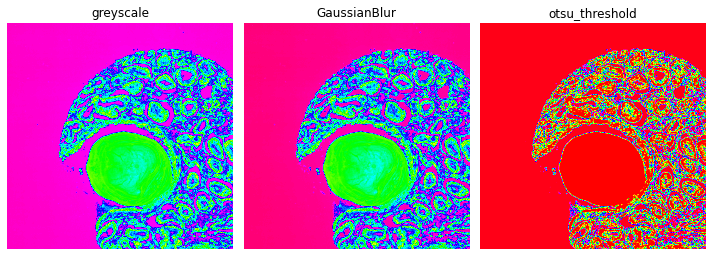

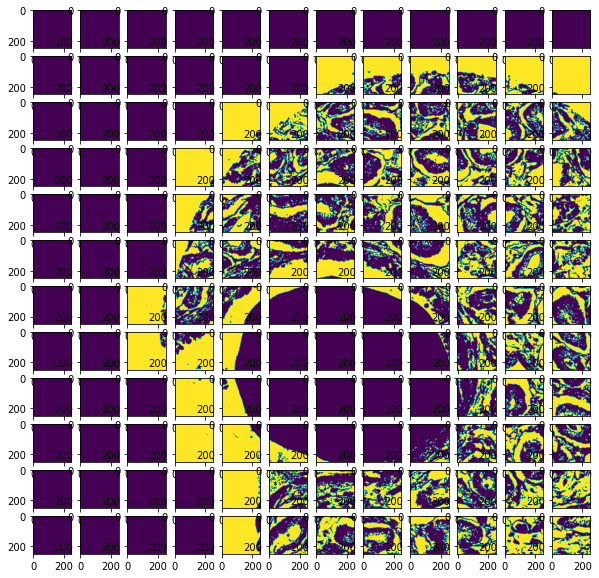

In [ ]:
# guassian blur + otsu + patch

ihc = cv2.imread("./data/images/ZT111_4_A_1_2.jpg",0)

# Apply GaussianBlur to reduce image noise if it is required
image = cv2.GaussianBlur(ihc, (7, 7), 0)

otsu_threshold, image_otsu = cv2.threshold(
    image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU,
)

fig, ( ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(10, 10))
ax1.imshow(ihc, cmap='hsv')
ax1.set_title("greyscale")
ax1.axis('off')
ax2.imshow(image, cmap='hsv')
ax2.set_title("GaussianBlur")
ax2.axis('off')
ax3.imshow(image_otsu, cmap='hsv')
ax3.set_title("otsu_threshold")
ax3.axis('off')

fig.tight_layout()

patch0=[]
patch14=[]
image = tf.expand_dims(image_otsu,0) # To create the batch information
image = tf.expand_dims(image,-1)
print('Image shape: {}'.format(image.shape))
patches = tf.image.extract_patches(images=image,
                                   sizes=[1, 250, 250, 1],
                                   strides=[1, 250, 250, 1],
                                   rates=[1, 1, 1, 1],
                                   padding='VALID')
print('patches shape:{}'.format(patches.shape))
plt.figure(figsize=(10, 10))
for imgs in patches:
    count = 0
    for r in range(12):
        for c in range(12):
            ax = plt.subplot(12, 12, count+1)
            plt.imshow(tf.reshape(imgs[r,c],shape=(250,250)).numpy().astype("uint8"))
            if count==0:
              patch0=tf.reshape(imgs[r,c],shape=(250,250)).numpy().astype("uint8")
            elif count==143:
              patch143=tf.reshape(imgs[r,c],shape=(250,250)).numpy().astype("uint8")
            count += 1



(250, 250)


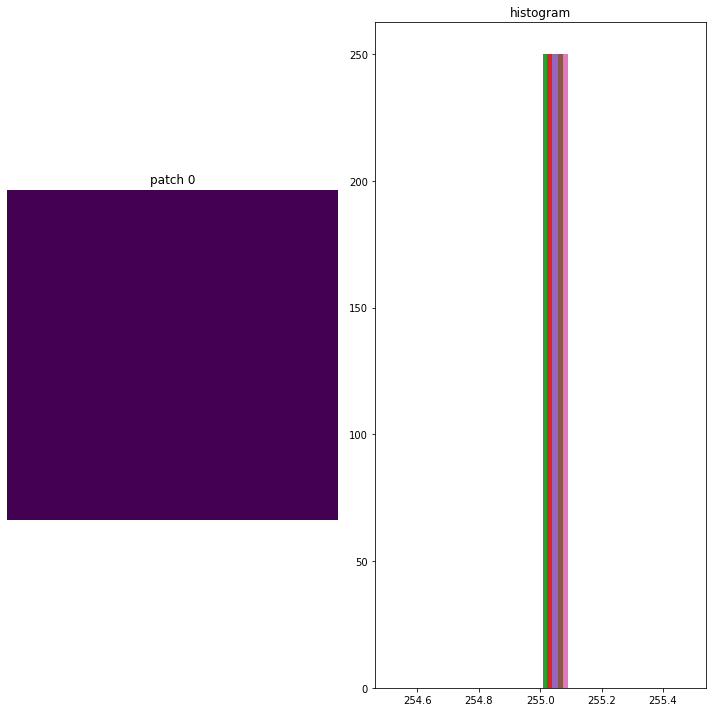

In [ ]:
print(patch0.shape)
fig, ( ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 10))
ax1.imshow(patch0)
ax1.set_title("patch 0")
ax1.axis('off')
ax2.hist(patch0, 10)
ax2.set_title("histogram")

fig.tight_layout()

(250, 250)


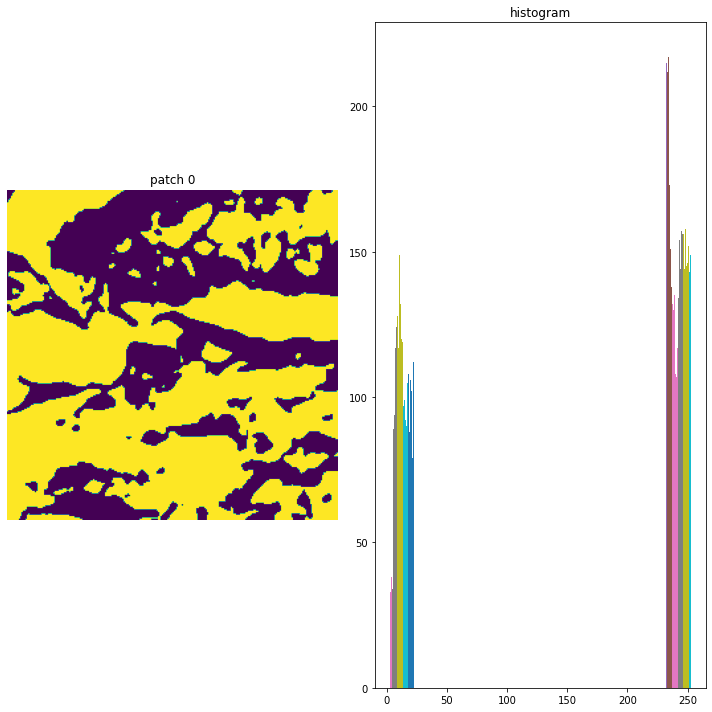

In [ ]:
print(patch143.shape)
fig, ( ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 10))
ax1.imshow(patch143)
ax1.set_title("patch 0")
ax1.axis('off')
ax2.hist(patch143, 10)
ax2.set_title("histogram")

fig.tight_layout()



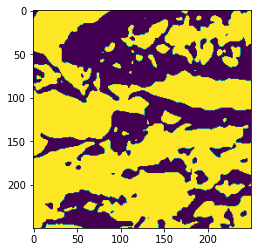

In [ ]:
plt.imshow(tf.where(patch143 > 100, 1, 0))

In [ ]:
import os
rootdir = './data/images/'

for subdir, dirs, files in os.walk(rootdir):
    for file in files:
        hed_aug(os.path.join(subdir, file))

ihc shape : (3100, 3100, 3)
hed shape :  (3100, 3100, 3)
new_imag shape:  (3100, 3100, 3)
image_name :  ZT111_4_A_3_9
hed shape :  (3100, 3100, 3)
new_imag shape:  (3100, 3100, 3)
image_name :  ZT111_4_A_3_9
hed shape :  (3100, 3100, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


new_imag shape:  (3100, 3100, 3)
image_name :  ZT111_4_A_3_9
hed shape :  (3100, 3100, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


new_imag shape:  (3100, 3100, 3)
image_name :  ZT111_4_A_3_9
hed shape :  (3100, 3100, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


new_imag shape:  (3100, 3100, 3)
image_name :  ZT111_4_A_3_9
ihc shape : (3100, 3100, 3)
hed shape :  (3100, 3100, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


new_imag shape:  (3100, 3100, 3)
image_name :  ZT111_4_A_1_2
hed shape :  (3100, 3100, 3)
new_imag shape:  (3100, 3100, 3)
image_name :  ZT111_4_A_1_2
hed shape :  (3100, 3100, 3)
new_imag shape:  (3100, 3100, 3)
image_name :  ZT111_4_A_1_2
hed shape :  (3100, 3100, 3)
new_imag shape:  (3100, 3100, 3)
image_name :  ZT111_4_A_1_2
hed shape :  (3100, 3100, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


new_imag shape:  (3100, 3100, 3)
image_name :  ZT111_4_A_1_2
ihc shape : (3100, 3100, 3)
hed shape :  (3100, 3100, 3)
new_imag shape:  (3100, 3100, 3)
image_name :  ZT111_4_A_3_4
hed shape :  (3100, 3100, 3)
new_imag shape:  (3100, 3100, 3)
image_name :  ZT111_4_A_3_4
hed shape :  (3100, 3100, 3)
new_imag shape:  (3100, 3100, 3)
image_name :  ZT111_4_A_3_4
hed shape :  (3100, 3100, 3)
new_imag shape:  (3100, 3100, 3)
image_name :  ZT111_4_A_3_4
hed shape :  (3100, 3100, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


new_imag shape:  (3100, 3100, 3)
image_name :  ZT111_4_A_3_4
ihc shape : (3100, 3100, 3)
hed shape :  (3100, 3100, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


new_imag shape:  (3100, 3100, 3)
image_name :  ZT111_4_A_1_12
hed shape :  (3100, 3100, 3)
new_imag shape:  (3100, 3100, 3)
image_name :  ZT111_4_A_1_12
hed shape :  (3100, 3100, 3)
new_imag shape:  (3100, 3100, 3)
image_name :  ZT111_4_A_1_12
hed shape :  (3100, 3100, 3)
new_imag shape:  (3100, 3100, 3)
image_name :  ZT111_4_A_1_12
hed shape :  (3100, 3100, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


new_imag shape:  (3100, 3100, 3)
image_name :  ZT111_4_A_1_12
ihc shape : (3100, 3100, 3)
hed shape :  (3100, 3100, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


new_imag shape:  (3100, 3100, 3)
image_name :  ZT111_4_A_3_13
hed shape :  (3100, 3100, 3)
new_imag shape:  (3100, 3100, 3)
image_name :  ZT111_4_A_3_13
hed shape :  (3100, 3100, 3)
new_imag shape:  (3100, 3100, 3)
image_name :  ZT111_4_A_3_13
hed shape :  (3100, 3100, 3)
new_imag shape:  (3100, 3100, 3)
image_name :  ZT111_4_A_3_13
hed shape :  (3100, 3100, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


new_imag shape:  (3100, 3100, 3)
image_name :  ZT111_4_A_3_13
ihc shape : (3100, 3100, 3)
hed shape :  (3100, 3100, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


new_imag shape:  (3100, 3100, 3)
image_name :  ZT111_4_A_2_10
hed shape :  (3100, 3100, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


new_imag shape:  (3100, 3100, 3)
image_name :  ZT111_4_A_2_10
hed shape :  (3100, 3100, 3)
new_imag shape:  (3100, 3100, 3)
image_name :  ZT111_4_A_2_10
hed shape :  (3100, 3100, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


new_imag shape:  (3100, 3100, 3)
image_name :  ZT111_4_A_2_10
hed shape :  (3100, 3100, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


new_imag shape:  (3100, 3100, 3)
image_name :  ZT111_4_A_2_10
